# **PROJECT 2 Level 2 WINE DATASET**

---



---



---



---



***Key Concepts and Challenges:***

1. Classifier Models: Utilizing Random Forest, Stochastic Gradient Descent, and Support Vector Classifier (SVC) for wine quality prediction.


2. Chemical Qualities: Analyzing features like density and acidity as predictors for wine quality.


3. Data Analysis Libraries: Employing Pandas for data manipulation and Numpy for array operations.


4. Data Visualization: Using Seaborn and Matplotlib for visualizing patterns and insights in the dataset.

**IMPORT DATA**

---



In [ ]:
import pandas as pd
from scipy.stats import zscore
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset/WineQT.csv")

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [ ]:
df.shape

(1143, 13)

# **1. DATA CLEANING**

---
*Remove null value from the table*


In [ ]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


# **2. FIND DUPLICATE VALUES and its dropdown**

---



In [ ]:
# Drop 'Id' column if it exists
if 'Id' in df.columns:
    df.drop(columns=['Id'], inplace=True)

# Check for duplicate rows
print(f"Duplicate entries: {df.duplicated().sum()}")

# Remove duplicates if needed
df.drop_duplicates(inplace=True)

Duplicate entries: 125


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000,1018.000000
mean,8.288507,0.533541,0.268802,2.524411,0.087187,15.648821,46.325639,0.996700,3.311503,0.656817,10.452456,5.641454
std,1.741324,0.183167,0.196229,1.314850,0.048506,10.176525,33.123533,0.001916,0.157775,0.167542,1.095064,0.811744
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995572,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,38.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997827,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# **3. VISUALIZE OUTLIERS**

---
*1. Free Sulfur Dioxide*
2. Total Sulfur Dioxide


***RESULT***

---



---
This will help us detect and handle outliers in the wine quality dataset before feeding it into the machine learning model.


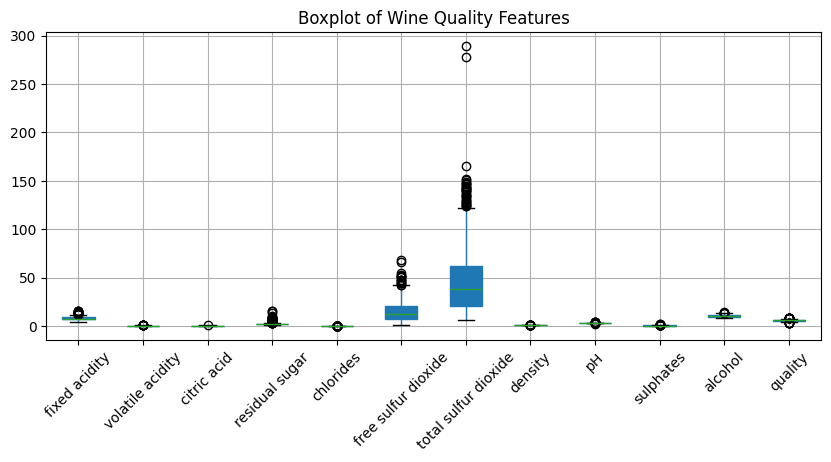

In [ ]:
# Plot boxplots for each feature
plt.figure(figsize=(10, 4))
df.boxplot(rot=45, patch_artist=True)
plt.title("Boxplot of Wine Quality Features")
plt.show()

**SOLVE OUTLIERS**

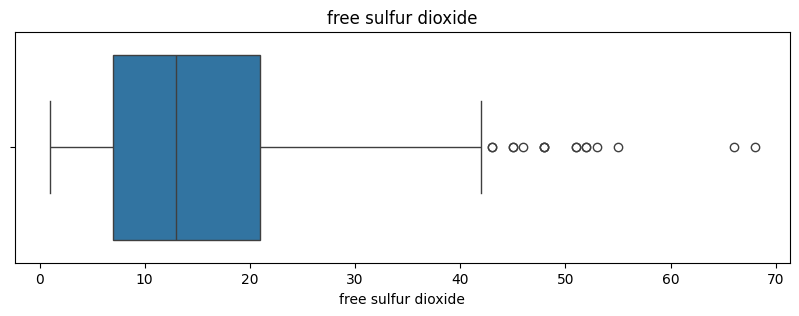

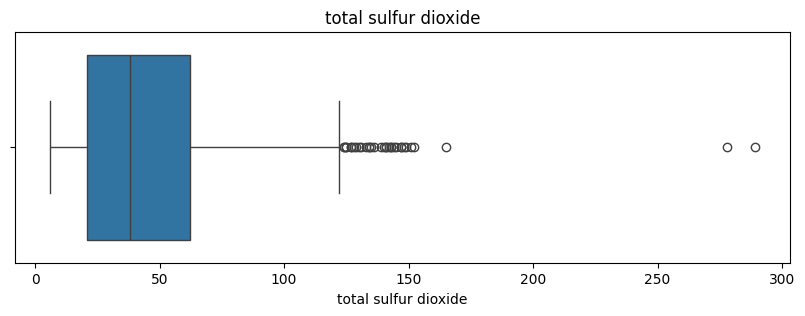

In [ ]:
a = ['free sulfur dioxide', 'total sulfur dioxide']

for i in a:
    figure = plt.figure(figsize = (10,3))
    sns.boxplot(df[i], orient = 'h')
    plt.title(i)
    plt.show()

In [ ]:
df=df[df['free sulfur dioxide']<=45]

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,8.292843,0.533514,0.269404,2.488419,0.086761,15.201292,45.822068,0.996688,3.311193,0.656650,10.455765,5.643141
std,1.745832,0.183242,0.196465,1.182426,0.048161,9.341396,32.935202,0.001901,0.157980,0.167786,1.094170,0.813376
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995563,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997800,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,45.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.shape

(1006, 12)

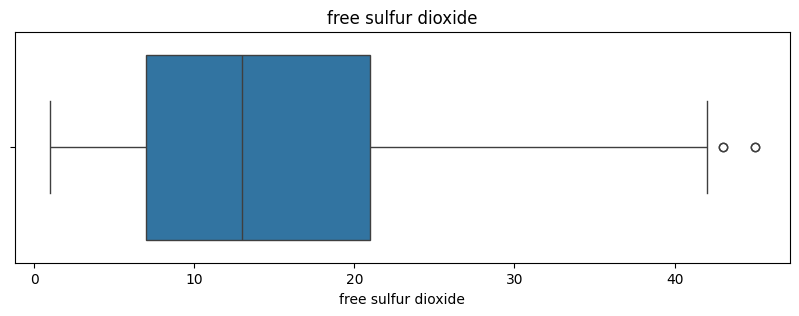

In [ ]:
figure = plt.figure(figsize= (10,3))
sns.boxplot(df['free sulfur dioxide'],orient= "h")
plt.title("free sulfur dioxide")
plt.show()

In [ ]:
q3 = df['free sulfur dioxide'].quantile(0.75)
q1 = df['free sulfur dioxide'].quantile(0.25)
IQR = q3 - q1

max_ = q3 + 1.5*IQR
min_ = q1 - 1.5*IQR

In [ ]:
print(q3)
print(q1)
max_

21.0
7.0


42.0

In [ ]:
out_index = df[df['free sulfur dioxide'] <=100].index  # fetching the indexes of outlying rows.
out_index

Index([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,
       ...
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142],
      dtype='int64', length=1006)

In [ ]:
df.loc[out_index,'free sulfur dioxide']

,free sulfur dioxide
0,11.0
1,25.0
2,15.0
3,17.0
5,13.0
...,...
1138,29.0
1139,28.0
1140,32.0
1141,39.0


In [ ]:
df.loc[out_index,'free sulfur dioxide'] = max_

In [ ]:
for i in range(len(df)):  # Corrected range
    out_index = i
    df.iloc[out_index]
    # ... rest of your code

In [ ]:
df.iloc[out_index]

,1142
fixed acidity,5.90000
volatile acidity,0.64500
citric acid,0.12000
residual sugar,2.00000
chlorides,0.07500
free sulfur dioxide,42.00000
total sulfur dioxide,44.00000
density,0.99547
pH,3.57000
sulphates,0.71000


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.0,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,8.292843,0.533514,0.269404,2.488419,0.086761,42.0,45.822068,0.996688,3.311193,0.656650,10.455765,5.643141
std,1.745832,0.183242,0.196465,1.182426,0.048161,0.0,32.935202,0.001901,0.157980,0.167786,1.094170,0.813376
min,4.600000,0.120000,0.000000,0.900000,0.012000,42.0,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,42.0,21.000000,0.995563,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,42.0,37.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,42.0,61.000000,0.997800,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,42.0,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,42.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,42.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,42.0,54.0,0.9970,3.26,0.65,9.8,5


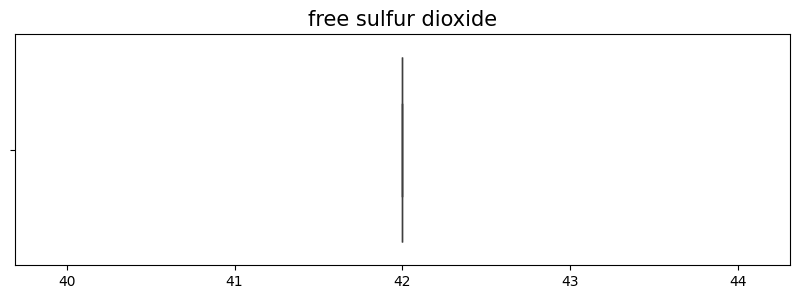

In [ ]:
figure = plt.figure(figsize = (10,3))
sns.boxplot(df["free sulfur dioxide"], orient = 'h')  # Corrected: No extra indentation
plt.title("free sulfur dioxide", fontsize = 15)
plt.xlabel('')
plt.show()

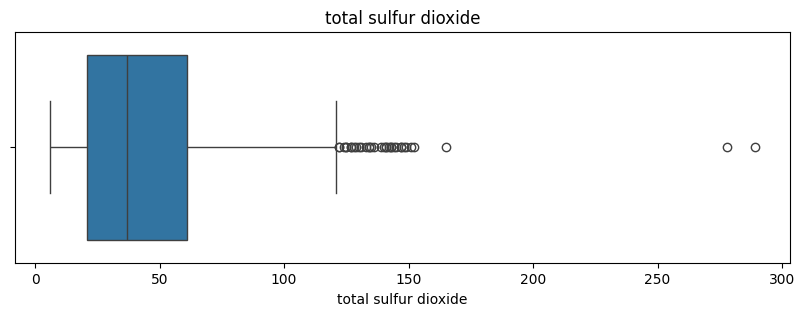

In [ ]:
figure = plt.figure(figsize= (10,3))
sns.boxplot(df['total sulfur dioxide'],orient= "h")
plt.title("total sulfur dioxide")
plt.show()

In [ ]:
q3 = df['total sulfur dioxide'].quantile(0.75)
q1 = df['total sulfur dioxide'].quantile(0.25)
IQR = q3 - q1

max_ = q3 + 1.5*IQR
min_ = q1 - 1.5*IQR

In [ ]:
print(q3)
print(IQR)
print(max_)

61.0
40.0
121.0


In [ ]:
out_index1 = df[df['total sulfur dioxide'] <=100].index  # fetching the indexes of outlying rows.
out_index1

Index([   0,    1,    2,    3,    5,    6,    7,    8,    9,   10,
       ...
       1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142],
      dtype='int64', length=930)

In [ ]:
df.loc[out_index1,'total sulfur dioxide']

,total sulfur dioxide
0,34.0
1,67.0
2,54.0
3,60.0
5,40.0
...,...
1138,40.0
1139,38.0
1140,44.0
1141,51.0


In [ ]:
df.loc[out_index1,'total sulfur dioxide'] = max_

In [ ]:
for i in range(len(df)):  # Corrected range
    out_index1 = i
    df.iloc[out_index1]
    # ... rest of your code

In [ ]:
df.iloc[out_index1]

,1142
fixed acidity,5.90000
volatile acidity,0.64500
citric acid,0.12000
residual sugar,2.00000
chlorides,0.07500
free sulfur dioxide,42.00000
total sulfur dioxide,121.00000
density,0.99547
pH,3.57000
sulphates,0.71000


In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.0,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,8.292843,0.533514,0.269404,2.488419,0.086761,42.0,121.394632,0.996688,3.311193,0.656650,10.455765,5.643141
std,1.745832,0.183242,0.196465,1.182426,0.048161,0.0,8.420086,0.001901,0.157980,0.167786,1.094170,0.813376
min,4.600000,0.120000,0.000000,0.900000,0.012000,42.0,101.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,42.0,121.000000,0.995563,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,42.0,121.000000,0.996665,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.645000,0.420000,2.600000,0.090000,42.0,121.000000,0.997800,3.400000,0.720000,11.200000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,42.0,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [ ]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,42.0,121.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,42.0,121.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,42.0,121.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,42.0,121.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,42.0,121.0,0.9978,3.51,0.56,9.4,5


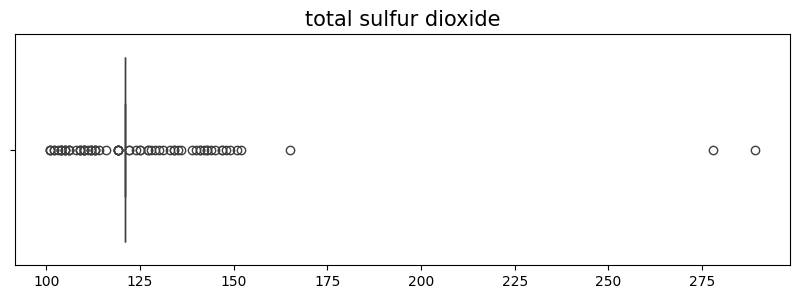

In [ ]:
figure = plt.figure(figsize = (10,3))
sns.boxplot(df["total sulfur dioxide"], orient = 'h')  # Corrected: No extra indentation
plt.title("total sulfur dioxide", fontsize = 15)
plt.xlabel('')
plt.show()

# **4. Relationship between Chemical Properties and Wine Properties**

---



<ipython-input-190-50b8553f3823>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['quality'], palette="coolwarm")


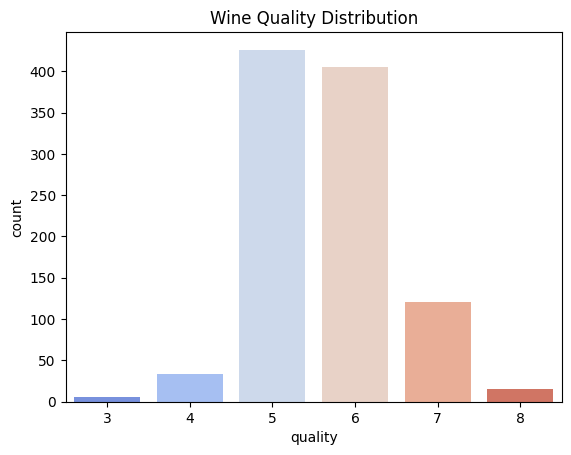

In [ ]:
# Distribution of wine quality
sns.countplot(x=df['quality'], palette="coolwarm")
plt.title("Wine Quality Distribution")
plt.show()

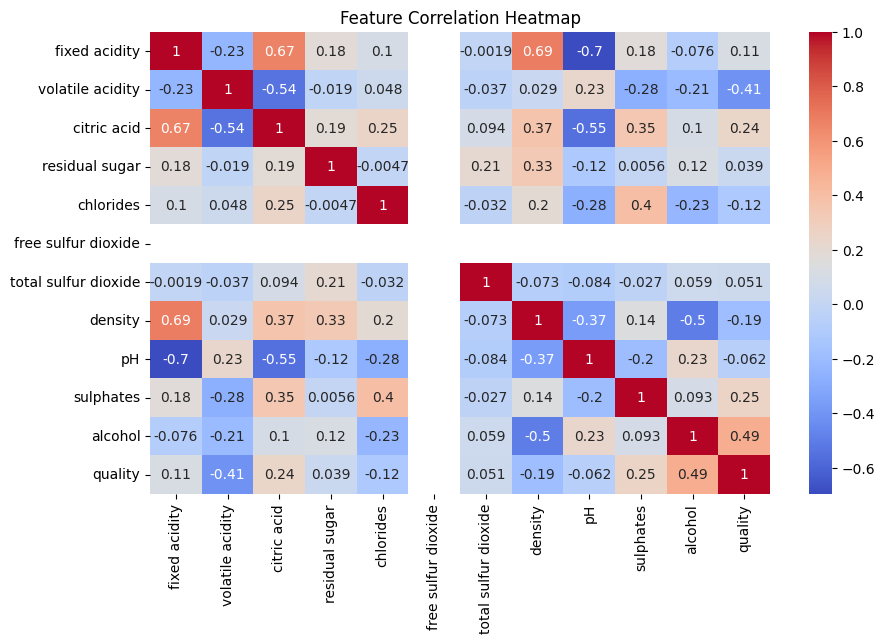

In [ ]:
# Visualizing correlation between features
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

***RESULT***

---



---
Relationship between Key Chemical Property & Wine Quality


# **5. Model training using PANDAS & SCIKIT - learn**

In [ ]:
# Define X (features) and y (target)
X = df.drop(columns=['quality'])
y = df['quality']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42),
    "Support Vector Classifier": SVC(kernel='rbf', random_state=42)
}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.2f}")

Random Forest Accuracy: 0.56
SGD Classifier Accuracy: 0.52
Support Vector Classifier Accuracy: 0.61


***RANDOM FOREST MODEL VISUALIZATIONS***

---



<ipython-input-193-1c5d6113bd2a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="coolwarm")


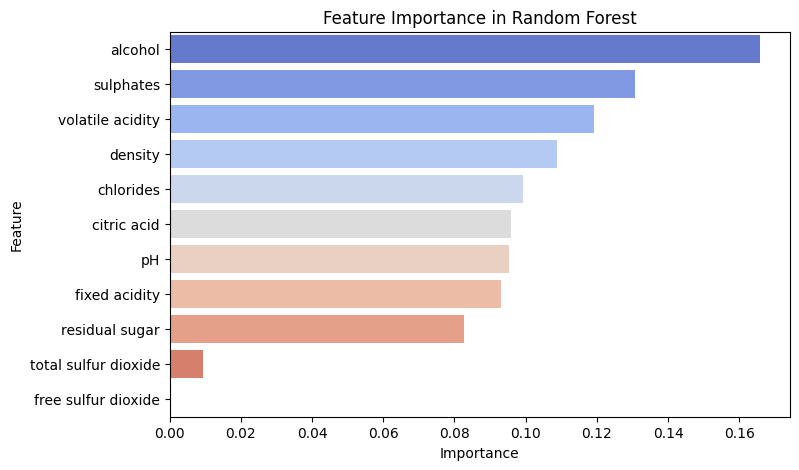

In [ ]:
# Get feature importance from Random Forest model
rf_model = models["Random Forest"]
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importance["Importance"], y=feature_importance["Feature"], palette="coolwarm")
plt.title("Feature Importance in Random Forest")
plt.show()

***RESULT***

---

---



<> It allow us to analyze, visualize, and train classification models on the wine quality dataset efficiently

---
1. Define features (X) and target (y)


2. Split dataset into training and testing sets


3. Train three models: Random Forest, SGD, and SVC


4. Evaluate accuracy of each model

